In [6]:
import os
os.chdir(r"C:/Users/User/Downloads/as_tweets")
import pandas as pd
import numpy as np
import re
import copy
import nltk
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

from nltk import word_tokenize, pos_tag, ne_chunk

In [7]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [10]:
from textblob import TextBlob

In [11]:
df=pd.read_csv("as_tweets.txt",error_bad_lines=False, delimiter="\n ")

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [12]:
df.head(100)

,American Sniper
0,If American Sniper doesn't make you proud to b...
1,Retweet if you're going to see the movie Ameri...
2,Retweet if you're going to see the movie Ameri...
3,Retweet if you're going to see the movie Ameri...
4,Fav if you're going to see the movie American ...
5,I just watched American Sniper. You have to se...
6,Did you know #Jesseventura sued fallen seal es...
7,American Sniper kind of reminds me of the movi...
8,"Did yâ€™all see ""American Sniper""? What a powe..."
9,american sniper Ù‚ØµØ© Ø­Ù‚ÙŠÙ‚ÙŠØ© 2015 1- h...


In [13]:
print(len(df))
df2=df.copy()
df2.head()

100037


,American Sniper
0,If American Sniper doesn't make you proud to b...
1,Retweet if you're going to see the movie Ameri...
2,Retweet if you're going to see the movie Ameri...
3,Retweet if you're going to see the movie Ameri...
4,Fav if you're going to see the movie American ...


In [14]:
hashtags={}
count=0
for i in df["American Sniper"]:
    hashtag=re.findall("#[a-zA-Z]+",i)
    
    sen=i
    for j in hashtag:
        temp=re.findall("([A-Z][a-z]*)",j)
        
        temp=" ".join(temp)
        sen=re.sub(j,temp,sen)
        if temp in hashtags:
            hashtags[temp]+=1
        else:
            hashtags[temp]=1
            
    sen=re.sub("(http\S+)","",sen)
    sen=re.sub(r'[^\x00-\x7F]+',' ', sen)
    df2["American Sniper"][count]=sen
    count+=1
    if count%10000==0:
        print(count)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


In [15]:
hashtags

{'Jesseventura': 2,
 'American Sniper': 16793,
 'The': 4,
 'Critics Choice': 3,
 'Freedom': 8,
 'Chris Kyle': 1144,
 'The Legend': 136,
 'L L T B': 9,
 'Honor Chris Kyle': 659,
 'Box Office': 45,
 'Oscar Noms': 759,
 'Wedding Ringer': 23,
 '': 7579,
 'Foxnews': 5,
 'Thnx Chris': 1,
 'E E B A F T As': 2,
 'I M A X': 14,
 'A L L D A Y': 2,
 'Mortdecai': 4,
 'Kill All Muslims': 1,
 'Bradley Cooper': 823,
 'Fuck Yeah': 2,
 'The Theoryof Everything': 55,
 'Still Alice': 12,
 'The Grand Budapest Hotel': 56,
 'Whiplash': 120,
 'Oscars': 1124,
 'Hollywood Morons': 1,
 'Stoked': 6,
 'Honorthefallen': 1,
 'Red Nation Rising': 78,
 'Selma': 151,
 'Fox News': 18,
 'Veteran': 2,
 'C H I': 5,
 'S A N': 1,
 'M C I': 1,
 'D F W': 1,
 'S A T': 1,
 'D E N': 1,
 'M I A': 1,
 'S H O T Show': 1,
 'God Bless Our Troops': 9,
 'Some Gave All': 1,
 'Never Forgotten': 3,
 'Hollywood': 83,
 'T C O T': 32,
 'S G P': 2,
 'P J N E T': 319,
 'Howard': 1,
 'The Nerd Machine': 1,
 'Nerd News': 1,
 'Drama Alert': 4,
 '

In [16]:
sorted(hashtags.items())

[('', 7579),
 ('A', 1),
 ('A B C', 2),
 ('A C', 1),
 ('A C C E S S', 1),
 ('A Clockwork Orange', 1),
 ('A D G Award', 1),
 ('A F C', 1),
 ('A F F F', 1),
 ('A F I Awards', 2),
 ('A F I Fest', 1),
 ('A F P', 2),
 ('A H S F R E A K S H O W', 2),
 ('A I B Knockout', 1),
 ('A Joke', 1),
 ('A L L D A Y', 2),
 ('A M', 1),
 ('A M A Z I N G', 1),
 ('A M C', 3),
 ('A M C B P S', 1),
 ('A M C Movie News', 1),
 ('A M E R I C A', 4),
 ('A M E R I C A N', 6),
 ('A M E R I C A N H E R O', 2),
 ('A M E R I C A N S', 1),
 ('A M E R I C A N S N I P E R', 71),
 ('A M E R I C A Nmovie', 1),
 ('A M E R I C A T H E B E A U T I F U L', 1),
 ('A Merican Sniper', 2),
 ('A Mirror For Our Society', 1),
 ('A Most Violent Year', 8),
 ('A Must Watch', 1),
 ('A Mvets', 1),
 ('A N T I W A R', 1),
 ('A N X I O U S', 1),
 ('A New King Is Crowned', 1),
 ('A S A P', 2),
 ('A S H A M E D', 1),
 ('A S L Oscars', 1),
 ('A S S A D', 11),
 ('A S S O L U T A M E N T E', 1),
 ('A True Hero', 1),
 ('A V C Honors', 1),
 ('A W E 

In [17]:
kk=[]
vv=[]
hashh=pd.DataFrame()
for key, value in sorted(hashtags.items()):
    #print "%s: %s" % (key, value)
    kk.append(key)
    vv.append(value)
hashh["Hashtag"]=kk
hashh["Count"]=vv
hashh.head()

,Hashtag,Count
0,,7579
1,A,1
2,A B C,2
3,A C,1
4,A C C E S S,1


In [18]:
hashh.drop(hashh.index[0],axis=0,inplace=True)

In [19]:
test = hashh.sort_values(['Count'], ascending=[False])
test.reset_index(drop = True, inplace= True)
test.head()

,Hashtag,Count
0,American Sniper,16793
1,Movie,1394
2,Review,1372
3,Chris Kyle,1144
4,Oscars,1124


In [20]:
# Save Hashtags with count
df2.to_csv("Cleaned_tweets.csv")
test.to_csv("Hashtags.csv")

In [21]:
positive_tweets=[]

for tweet in df2["American Sniper"]:
    analysis = TextBlob(tweet) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        positive_tweets.append(analysis)


In [22]:
len(positive_tweets)

37509

In [23]:
"American" in positive_tweets[1]

True

In [24]:
positive_tweets[1]

TextBlob("American Sniper kind of reminds me of the movie that's showing in the third act of Inglorious Basterds.")

In [25]:
for i in range(len(positive_tweets)):
    positive_tweets[i]=positive_tweets[i].lower()
    

In [26]:
chris=[]
bradley=[]
clint=[]
for i in positive_tweets:
    if "bradley" in i or "cooper" in i:
        bradley.append(i)
    if "clint" in i or "eastwood" in i:
        clint.append(i)
    if "chris" in i or "kyle" in i:
        chris.append(i)


In [32]:
bradley[:1000]

[TextBlob("did y all see "american sniper"? what a powerful movie. bradley cooper isn t too hard on the eyes, either."),
 TextBlob("about to watch american sniper with my 3 week old son. he's proper buzzing & loves bradley cooper"),
 TextBlob("bradley cooper is awesome in american sniper should be nominated."),
 TextBlob("bradley cooper was fantastic in american sniper.....ditto for sienna miller"),
 TextBlob("holy moly! so proud of bradley cooper! absolutely phenomenal in american sniper"),
 TextBlob("genuinely pleased with american sniper. bradley cooper was pretty damn impressive."),
 TextBlob("see bradley cooper play a reluctant hero in new american sniper clip (exclusive)  "),
 TextBlob("bradley cooper is brilliant. american sniper makes me want to hug my babies & our soldiers. @americansnipermovie   "),
 TextBlob("congratulations to bradley cooper on his critics choice nomination for best actor in an action movie! american sniper "),
 TextBlob("thank u clint eastwood & bradley co

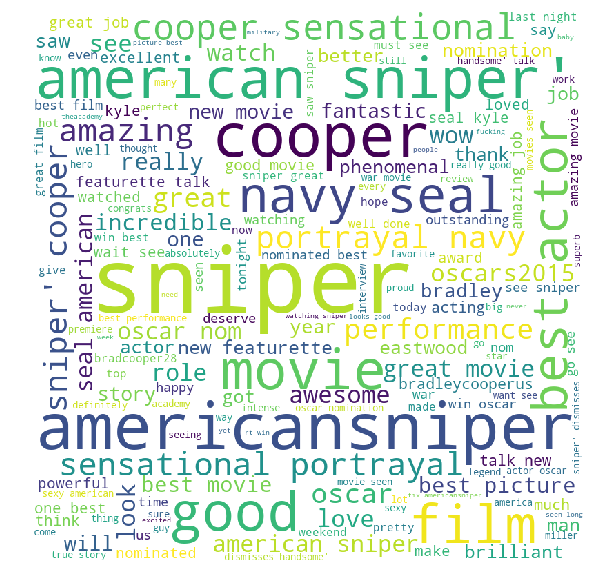

In [63]:
len(bradley)
stopwords = set(STOPWORDS)
words=" "

leng=len(bradley)
count=0
stopwords_2=["american","sniper","bradley","cooper","chris","kyle","sienna","miller","clint","eastwood","americansniper"]
while(count<leng):
    temp_word=bradley[count].split()
    count+=1
    
    for tokens in temp_word:
        if tokens not in stopwords_2:
            
            words+=tokens+" "


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

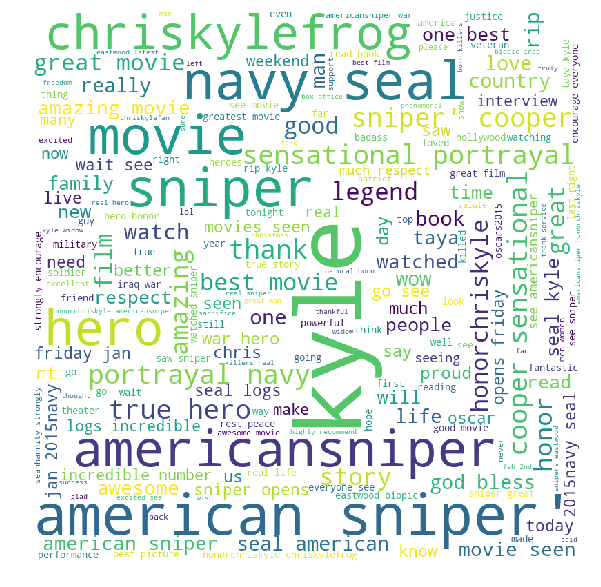

In [64]:
len(chris)
stopwords = set(STOPWORDS)
words=" "

leng=len(chris)
count=0
stopwords_2=["american","sniper","bradley","cooper","chris","kyle","sienna","miller","clint","eastwood","americansniper"]
while(count<leng):
    temp_word=chris[count].split()
    count+=1
    
    for tokens in temp_word:
        if tokens not in stopwords_2:
            
            words+=tokens+" "


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

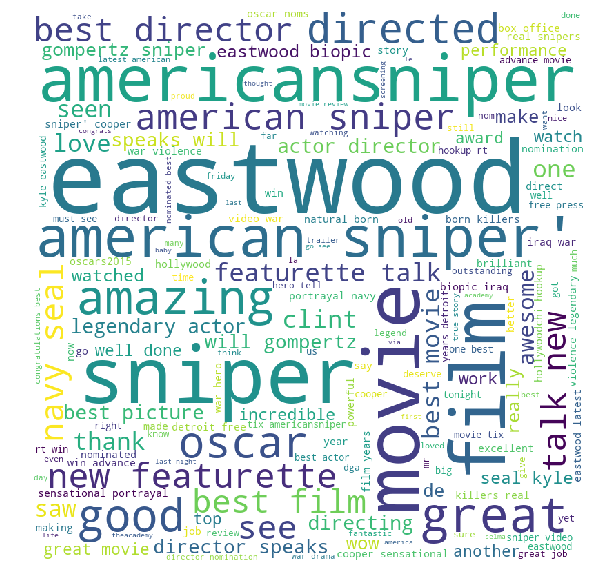

In [65]:
len(clint)
stopwords = set(STOPWORDS)
words=" "

leng=len(clint)
count=0
stopwords_2=["american","sniper","bradley","cooper","chris","kyle","sienna","miller","clint","eastwood","americansniper"]
while(count<leng):
    temp_word=clint[count].split()
    count+=1
    
    for tokens in temp_word:
        if tokens not in stopwords_2:
            
            words+=tokens+" "


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 